# Differential Evolution for Rosenbrock Function

In [1]:
import numpy as np
import random 
import math
from pyswarms.utils.functions.single_obj import rosenbrock_func
from operator import itemgetter
from numpy import linspace
import matplotlib.pyplot as plt

## Methods used 

In [2]:
def Initializtion(N, no_of_var , start, end, method, function = "Default"):
    # Enter Trignometric in function parameter to get trignometric initialization
    population = []
    function_values = []
    for count in range(N):
        value = []
        if function == "Default":
            for each in range(no_of_var):
                value.append(random.randrange(start, end))
            population.append(value)
        else:
            for each in range(no_of_var):
                value.append(math.pi * random.randrange(start, end))
            population.append(value)
        function_values.append(method(value))
    return np.array(population), function_values

def Mutation(pops, f = 1.5):
    pop = np.array(pops)
    mutant = []
    for each in range(int(np.shape(pop)[0])): 
        rand1 = random.random()*np.shape(pop)[0]
        rand2 = random.random()*np.shape(pop)[0]
        parent1 = pop[int(rand1 - rand1%1)]
        parent2 = pop[int(rand2 - rand2%1)]
        rand3 = random.random()*np.shape(pop)[0]
        rand4 = random.random()*np.shape(pop)[0]
        rand5 = random.random()*np.shape(pop)[0]
        parent3 = pop[int(rand3 - rand3%1)]
        parent4 = pop[int(rand4 - rand4%1)]
        parent5 = pop[int(rand5 - rand5%1)]
        child = parent1 + f * (parent2 - parent3 + parent4 - parent5)
        mutant.append(child)
    return mutant

def Crossover(pops, mutant, cross_over_constant = 0.4):
    pop = list(pops)
    mutant = list(mutant)
    trial_vector = []
    for each1 in range(int(np.shape(pop)[0])):
        cross1 = []
        #print(int(np.shape(pop[0])[0]))
        for each2 in range(int((np.shape(pop[0]))[0])):
            rand1 = random.random()
            if rand1 <= cross_over_constant:
                #print(mutant[each1][each2])
                temp = mutant[each1][each2]
                cross1.append((temp))
            else:
                #print(pops[each1][each2])
                temp = pops[each1][each2]
                cross1.append((temp))
            #print("CROSS", each1, each2, cross1)
        trial_vector.append(cross1)
    return trial_vector
def Selection(pops, trial_vector, function, arrangement,actual):
    output = []
    value = []
    if arrangement.lower() == "min":
        for each1 in range(int(np.shape(pops)[0])):
            #print(int(np.shape(pop[0])[0]))
                if function(np.array(pops[each1])) >= function(np.array(trial_vector[each1])):
                    #print("pops")
                    output.append(np.array(pops[each1]))
                    value.append(function(pops[each1]))
                else:
                    #print("trial_vector")
                    output.append(np.array(trial_vector[each1]))
                    value.append(function(trial_vector[each1]))
                #print(output
    elif arrangement.lower() == "max":
        for each1 in range(int(np.shape(pops)[0])):
            #print(int(np.shape(pop[0])[0]))
                if function(np.array(pops[each1])) <= function(np.array(trial_vector[each1])):
                    #print("pops")
                    output.append(np.array(pops[each1]))
                    value.append(function(pops[each1]))
                else:
                    #print("trial_vector")
                    output.append(np.array(trial_vector[each1]))
                    value.append(function(trial_vector[each1]))
                #print(output
    pops = list(output)
    #print(np.shape(pops), np.shape(output))
    pops2 = np.column_stack(((pops),(value))) 
    #print(np.shape(pops2))
    ind = np.argsort(pops2[:,-1]);
    #print(pops2)
    sorted_list = pops2[ind]
    #print(sorted_list)
    if arrangement.lower() == "min":
        #print(type(sorted_list))
        return sorted_list[:actual, :-1]
    elif arrangement.lower() == "max":
        #print(type(sorted_list))
        return sorted_list[-actual:, :-1]

In [3]:
def method(x):
    return rosenbrock_func(np.array(x))

## Testing and Training

In [4]:
best = []
output = []
i, function_value = Initializtion(100 ,100 , 1, 10, method)
for each in range(1000):
    #print(each)
    mutated = Mutation(i)
    #print("Mutated", mutated)
    #print(np.shape(i[0]))
    trial_vector = Crossover(i , mutated)
    #print("Trial", trial_vector)
    output1 = Selection(i, trial_vector, method, "max", 5)
    i = np.array(output1)
    #print("output",output1)
    output.append(method(i[0]))


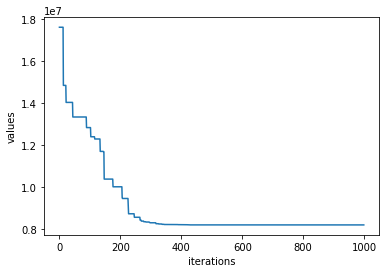

In [5]:
plt.plot(output)
plt.ylabel('values')
plt.xlabel('iterations')
plt.show()